# FLIGHT PRICE PREDICTION

In [86]:
#lets import necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [87]:
#import the dataset
df=pd.read_csv('flight_data_.csv')
df.head()

,Flight Name,Depart Location,Arrival Location,Depart Time,Arrival Time,Total Stop,Total Time,Price,Date of Journey
0,Go First,New Delhi,Nagpur,20:40,22:10,Non Stop,1h 30m,"5,114",04-02-2023
1,IndiGo,New Delhi,Nagpur,20:10,21:50,Non Stop,1h 40m,"5,114",04-02-2023
2,IndiGo,New Delhi,Nagpur,05:15,07:00,Non Stop,1h 45m,"5,114",04-02-2023
3,IndiGo,New Delhi,Nagpur,09:35,11:20,Non Stop,1h 45m,"5,114",04-02-2023
4,IndiGo,New Delhi,Nagpur,14:50,16:35,Non Stop,1h 45m,"5,114",04-02-2023


## Pre-processing

In [88]:
df.shape

(1643, 9)

In [89]:
#checking the total columns present 
df.columns

Index(['Flight Name', 'Depart Location', 'Arrival Location', 'Depart Time',
       'Arrival Time', 'Total Stop', 'Total Time', 'Price', 'Date of Journey'],
      dtype='object')

In [90]:
# checking the information and datatypes of each columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1643 entries, 0 to 1642
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Flight Name       1643 non-null   object
 1   Depart Location   1643 non-null   object
 2   Arrival Location  1643 non-null   object
 3   Depart Time       1643 non-null   object
 4   Arrival Time      1643 non-null   object
 5   Total Stop        1643 non-null   object
 6   Total Time        1643 non-null   object
 7   Price             1643 non-null   object
 8   Date of Journey   1643 non-null   object
dtypes: object(9)
memory usage: 115.6+ KB


In [91]:
df.isnull().sum()

Flight Name         0
Depart Location     0
Arrival Location    0
Depart Time         0
Arrival Time        0
Total Stop          0
Total Time          0
Price               0
Date of Journey     0
dtype: int64

In [92]:
#  check  the duplicate
duplicate = df[df.duplicated()]
print("Duplicate Rows :")
 
#  Print the resultant Dataframe
duplicate

Duplicate Rows :


,Flight Name,Depart Location,Arrival Location,Depart Time,Arrival Time,Total Stop,Total Time,Price,Date of Journey
362,Vistara,Goa,New Delhi,00:40,16:45,2 Stop(s),16h 05m,"25,037",04-01-2023
365,Vistara,Goa,New Delhi,00:40,22:00,2 Stop(s),21h 20m,"25,491",04-01-2023
449,Vistara,Chennai,Mumbai,07:05,14:05,2 Stop(s),31h 00m,"16,624",04-01-2023
552,Air India,Chennai,Pune,11:10,21:10,2 Stop(s),10h 00m,"22,373",04-01-2023
663,Air India,Chennai,Pune,06:10,18:10,2 Stop(s),12h 00m,"14,044",04-02-2023
926,Air India,Goa,Mumbai,01:15,14:55,2 Stop(s),13h 40m,"16,744",04-02-2023
929,Air India,Goa,Mumbai,14:05,22:05,2 Stop(s),32h 00m,"18,942",04-02-2023
1282,Vistara,Goa,Mumbai,14:40,14:35,2 Stop(s),23h 55m,"10,524",19-01-2023
1284,Vistara,Goa,Mumbai,14:40,16:55,2 Stop(s),26h 15m,"10,525",19-01-2023


In [93]:
df.drop_duplicates(inplace=True)

In [94]:
#  check  the duplicate
duplicate = df[df.duplicated()]
print("Duplicate Rows :")
 
#  Print the resultant Dataframe
duplicate

Duplicate Rows :


,Flight Name,Depart Location,Arrival Location,Depart Time,Arrival Time,Total Stop,Total Time,Price,Date of Journey


In [95]:
df.shape

(1634, 9)

In [96]:
df["Total Time"].value_counts()

2h 15m     55
2h 10m     35
2h 00m     24
2h 25m     22
6h 30m     22
           ..
15h 15m     1
18h 30m     1
29h 55m     1
18h 00m     1
20h 25m     1
Name: Total Time, Length: 267, dtype: int64

In [97]:
# Adding month to the dataset

df['Day'] = pd.DatetimeIndex(df['Date of Journey']).month
df.head(20)

,Flight Name,Depart Location,Arrival Location,Depart Time,Arrival Time,Total Stop,Total Time,Price,Date of Journey,Day
0,Go First,New Delhi,Nagpur,20:40,22:10,Non Stop,1h 30m,"5,114",04-02-2023,4
1,IndiGo,New Delhi,Nagpur,20:10,21:50,Non Stop,1h 40m,"5,114",04-02-2023,4
2,IndiGo,New Delhi,Nagpur,05:15,07:00,Non Stop,1h 45m,"5,114",04-02-2023,4
3,IndiGo,New Delhi,Nagpur,09:35,11:20,Non Stop,1h 45m,"5,114",04-02-2023,4
4,IndiGo,New Delhi,Nagpur,14:50,16:35,Non Stop,1h 45m,"5,114",04-02-2023,4
5,IndiGo,New Delhi,Nagpur,20:20,07:50,1 Stop,11h 30m,"7,023",04-02-2023,4
6,IndiGo,New Delhi,Nagpur,23:40,07:50,1 Stop,8h 10m,"7,133",04-02-2023,4
7,IndiGo,New Delhi,Nagpur,12:30,20:25,1 Stop,7h 55m,"7,989",04-02-2023,4
8,IndiGo,New Delhi,Nagpur,22:00,07:50,1 Stop,9h 50m,"8,384",04-02-2023,4
9,IndiGo,New Delhi,Nagpur,05:00,15:30,1 Stop,10h 30m,"8,512",04-02-2023,4


In [98]:
# Adding month to the dataset

df['Month'] = pd.DatetimeIndex(df['Date of Journey']).day
df.head()

,Flight Name,Depart Location,Arrival Location,Depart Time,Arrival Time,Total Stop,Total Time,Price,Date of Journey,Day,Month
0,Go First,New Delhi,Nagpur,20:40,22:10,Non Stop,1h 30m,"5,114",04-02-2023,4,2
1,IndiGo,New Delhi,Nagpur,20:10,21:50,Non Stop,1h 40m,"5,114",04-02-2023,4,2
2,IndiGo,New Delhi,Nagpur,05:15,07:00,Non Stop,1h 45m,"5,114",04-02-2023,4,2
3,IndiGo,New Delhi,Nagpur,09:35,11:20,Non Stop,1h 45m,"5,114",04-02-2023,4,2
4,IndiGo,New Delhi,Nagpur,14:50,16:35,Non Stop,1h 45m,"5,114",04-02-2023,4,2


In [99]:
# Adding month to the dataset

df['year'] = pd.DatetimeIndex(df['Date of Journey']).year
df.head()

,Flight Name,Depart Location,Arrival Location,Depart Time,Arrival Time,Total Stop,Total Time,Price,Date of Journey,Day,Month,year
0,Go First,New Delhi,Nagpur,20:40,22:10,Non Stop,1h 30m,"5,114",04-02-2023,4,2,2023
1,IndiGo,New Delhi,Nagpur,20:10,21:50,Non Stop,1h 40m,"5,114",04-02-2023,4,2,2023
2,IndiGo,New Delhi,Nagpur,05:15,07:00,Non Stop,1h 45m,"5,114",04-02-2023,4,2,2023
3,IndiGo,New Delhi,Nagpur,09:35,11:20,Non Stop,1h 45m,"5,114",04-02-2023,4,2,2023
4,IndiGo,New Delhi,Nagpur,14:50,16:35,Non Stop,1h 45m,"5,114",04-02-2023,4,2,2023


In [100]:
#Removing unncessary columns
df.drop(['Date of Journey'],axis=1,inplace = True)

In [101]:
# Extracting Hours
df["Dep_hour"] = pd.to_datetime(df["Depart Time"]).dt.hour

# Extracting Minutes
df["Dep_min"] = pd.to_datetime(df["Depart Time"]).dt.minute

In [102]:
df.head()

,Flight Name,Depart Location,Arrival Location,Depart Time,Arrival Time,Total Stop,Total Time,Price,Day,Month,year,Dep_hour,Dep_min
0,Go First,New Delhi,Nagpur,20:40,22:10,Non Stop,1h 30m,"5,114",4,2,2023,20,40
1,IndiGo,New Delhi,Nagpur,20:10,21:50,Non Stop,1h 40m,"5,114",4,2,2023,20,10
2,IndiGo,New Delhi,Nagpur,05:15,07:00,Non Stop,1h 45m,"5,114",4,2,2023,5,15
3,IndiGo,New Delhi,Nagpur,09:35,11:20,Non Stop,1h 45m,"5,114",4,2,2023,9,35
4,IndiGo,New Delhi,Nagpur,14:50,16:35,Non Stop,1h 45m,"5,114",4,2,2023,14,50


In [103]:
# Extracting Hours
df["Arrival_hour"] = pd.to_datetime(df['Arrival Time']).dt.hour

# Extracting Minutes
df["Arrival_min"] = pd.to_datetime(df['Arrival Time']).dt.minute

In [104]:
df.head()

,Flight Name,Depart Location,Arrival Location,Depart Time,Arrival Time,Total Stop,Total Time,Price,Day,Month,year,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,Go First,New Delhi,Nagpur,20:40,22:10,Non Stop,1h 30m,"5,114",4,2,2023,20,40,22,10
1,IndiGo,New Delhi,Nagpur,20:10,21:50,Non Stop,1h 40m,"5,114",4,2,2023,20,10,21,50
2,IndiGo,New Delhi,Nagpur,05:15,07:00,Non Stop,1h 45m,"5,114",4,2,2023,5,15,7,0
3,IndiGo,New Delhi,Nagpur,09:35,11:20,Non Stop,1h 45m,"5,114",4,2,2023,9,35,11,20
4,IndiGo,New Delhi,Nagpur,14:50,16:35,Non Stop,1h 45m,"5,114",4,2,2023,14,50,16,35


In [105]:
#Removing unncessary columns
df.drop(['Depart Time','Arrival Time'],axis=1,inplace = True)
df.head()

,Flight Name,Depart Location,Arrival Location,Total Stop,Total Time,Price,Day,Month,year,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,Go First,New Delhi,Nagpur,Non Stop,1h 30m,"5,114",4,2,2023,20,40,22,10
1,IndiGo,New Delhi,Nagpur,Non Stop,1h 40m,"5,114",4,2,2023,20,10,21,50
2,IndiGo,New Delhi,Nagpur,Non Stop,1h 45m,"5,114",4,2,2023,5,15,7,0
3,IndiGo,New Delhi,Nagpur,Non Stop,1h 45m,"5,114",4,2,2023,9,35,11,20
4,IndiGo,New Delhi,Nagpur,Non Stop,1h 45m,"5,114",4,2,2023,14,50,16,35


In [106]:
# Time taken by plane to reach destination is called Duration
# It is the differnce betwwen Departure Time and Arrival time


# Assigning and converting Duration column into list
duration = list(df["Total Time"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [107]:
# Adding duration_hours and duration_mins list to df dataframe

df["Duration_hours"] = duration_hours
df["Duration_mins"] = duration_mins

In [108]:
df.drop(["Total Time"], axis = 1, inplace = True)

In [109]:
df.head()

,Flight Name,Depart Location,Arrival Location,Total Stop,Price,Day,Month,year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,Go First,New Delhi,Nagpur,Non Stop,"5,114",4,2,2023,20,40,22,10,1,30
1,IndiGo,New Delhi,Nagpur,Non Stop,"5,114",4,2,2023,20,10,21,50,1,40
2,IndiGo,New Delhi,Nagpur,Non Stop,"5,114",4,2,2023,5,15,7,0,1,45
3,IndiGo,New Delhi,Nagpur,Non Stop,"5,114",4,2,2023,9,35,11,20,1,45
4,IndiGo,New Delhi,Nagpur,Non Stop,"5,114",4,2,2023,14,50,16,35,1,45


In [110]:
df.columns

Index(['Flight Name', 'Depart Location', 'Arrival Location', 'Total Stop',
       'Price', 'Day', 'Month', 'year', 'Dep_hour', 'Dep_min', 'Arrival_hour',
       'Arrival_min', 'Duration_hours', 'Duration_mins'],
      dtype='object')

### Here data type of price is object but price cannot be object it should be float or int so treating datatype

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1634 entries, 0 to 1642
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Flight Name       1634 non-null   object
 1   Depart Location   1634 non-null   object
 2   Arrival Location  1634 non-null   object
 3   Total Stop        1634 non-null   object
 4   Price             1634 non-null   object
 5   Day               1634 non-null   int64 
 6   Month             1634 non-null   int64 
 7   year              1634 non-null   int64 
 8   Dep_hour          1634 non-null   int64 
 9   Dep_min           1634 non-null   int64 
 10  Arrival_hour      1634 non-null   int64 
 11  Arrival_min       1634 non-null   int64 
 12  Duration_hours    1634 non-null   int64 
 13  Duration_mins     1634 non-null   int64 
dtypes: int64(9), object(5)
memory usage: 191.5+ KB


In [112]:
df.loc[df['Price']==',']

,Flight Name,Depart Location,Arrival Location,Total Stop,Price,Day,Month,year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins


In [113]:
df['Price'] = df['Price'].str.replace(",",'').astype(float)

In [114]:
df.head()

,Flight Name,Depart Location,Arrival Location,Total Stop,Price,Day,Month,year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,Go First,New Delhi,Nagpur,Non Stop,5114.0,4,2,2023,20,40,22,10,1,30
1,IndiGo,New Delhi,Nagpur,Non Stop,5114.0,4,2,2023,20,10,21,50,1,40
2,IndiGo,New Delhi,Nagpur,Non Stop,5114.0,4,2,2023,5,15,7,0,1,45
3,IndiGo,New Delhi,Nagpur,Non Stop,5114.0,4,2,2023,9,35,11,20,1,45
4,IndiGo,New Delhi,Nagpur,Non Stop,5114.0,4,2,2023,14,50,16,35,1,45


In [115]:
df.dtypes

Flight Name          object
Depart Location      object
Arrival Location     object
Total Stop           object
Price               float64
Day                   int64
Month                 int64
year                  int64
Dep_hour              int64
Dep_min               int64
Arrival_hour          int64
Arrival_min           int64
Duration_hours        int64
Duration_mins         int64
dtype: object

In [116]:
df.head()

,Flight Name,Depart Location,Arrival Location,Total Stop,Price,Day,Month,year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,Go First,New Delhi,Nagpur,Non Stop,5114.0,4,2,2023,20,40,22,10,1,30
1,IndiGo,New Delhi,Nagpur,Non Stop,5114.0,4,2,2023,20,10,21,50,1,40
2,IndiGo,New Delhi,Nagpur,Non Stop,5114.0,4,2,2023,5,15,7,0,1,45
3,IndiGo,New Delhi,Nagpur,Non Stop,5114.0,4,2,2023,9,35,11,20,1,45
4,IndiGo,New Delhi,Nagpur,Non Stop,5114.0,4,2,2023,14,50,16,35,1,45


## EDA and Visualization

IndiGo          493
Air India       432
Vistara         396
Go First        119
SpiceJet         98
Air Asia         93
Alliance Air      3
Name: Flight Name, dtype: int64
********************


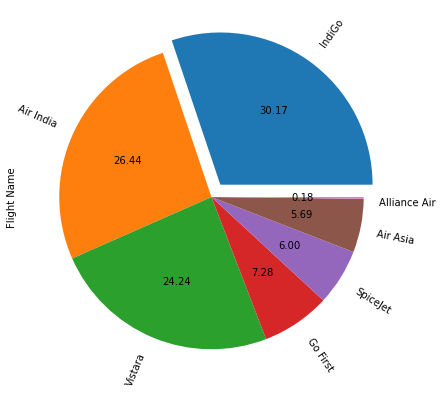

In [117]:
plt.figure(figsize=(7,7))
df['Flight Name'].value_counts().plot(kind='pie',autopct = '%.2f' , rotatelabels = True,explode = [0.1,0,0,0,0,0,0])
print(df['Flight Name'].value_counts())
print('*'*20)
plt.show()

### From the above pie chart, we observe that we have 7 different airlines and the indigo count is almost 30.17% followed by air India at 26.44% and the least is Alliance Air which is 0.18%.

Goa          573
New Delhi    542
Chennai      472
Nagpur        47
Name: Depart Location, dtype: int64
********************


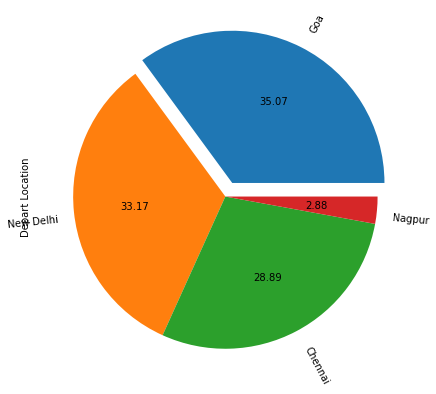

In [118]:
plt.figure(figsize=(7,7))
df['Depart Location'].value_counts().plot(kind='pie',autopct = '%.2f' , rotatelabels = True,explode = [0.1,0,0,0])
print(df['Depart Location'].value_counts())
print('*'*20)
plt.show()

### From the above pie chart, we have 4 different Departure locations and the count of people departing from goa is the most which are 35.07% followed by NewDelhi which is 33.17% followed by Chennai is 28.89% and the least is Nagpur which is 2.88%.

Mumbai       935
New Delhi    389
Pune         233
Nagpur        77
Name: Arrival Location, dtype: int64
********************


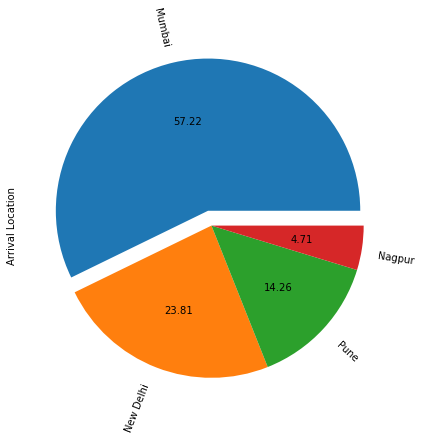

In [119]:
plt.figure(figsize=(7,7))
df['Arrival Location'].value_counts().plot(kind='pie',autopct = '%.2f' , rotatelabels = True,explode = [0.1,0,0,0])
print(df['Arrival Location'].value_counts())
print('*'*20)
plt.show()

### From the above pie chart, we have 4 different Arrival locations and the count of people who arrived from Mumbai is the most which are 57.22% followed by NewDelhi which is 23.81% followed by Pune is 14.26% and the least is Nagpur which is 4.71%.

1 Stop       1131
Non Stop      365
2 Stop(s)     137
3 Stop(s)       1
Name: Total Stop, dtype: int64
********************


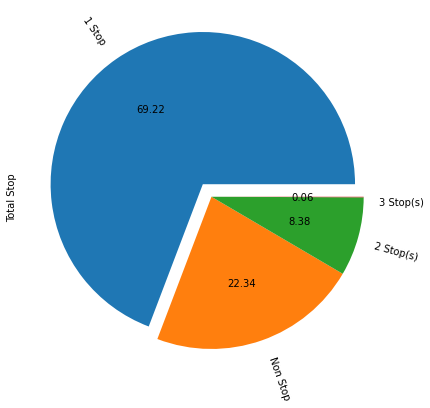

In [121]:
plt.figure(figsize=(7,7))
df['Total Stop'].value_counts().plot(kind='pie',autopct = '%.2f' , rotatelabels = True,explode = [0.1,0,0,0])
print(df['Total Stop'].value_counts())
print('*'*20)
plt.show()

### From the above pie chart, we observe the count of the flight with one stop is more which is 69.22% followed by non-stop flights with 22.34% followed by 2 stops and 3 stops which is 8.36% and 0.06%.

In [123]:
df.head()

,Flight Name,Depart Location,Arrival Location,Total Stop,Price,Day,Month,year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,Go First,New Delhi,Nagpur,Non Stop,5114.0,4,2,2023,20,40,22,10,1,30
1,IndiGo,New Delhi,Nagpur,Non Stop,5114.0,4,2,2023,20,10,21,50,1,40
2,IndiGo,New Delhi,Nagpur,Non Stop,5114.0,4,2,2023,5,15,7,0,1,45
3,IndiGo,New Delhi,Nagpur,Non Stop,5114.0,4,2,2023,9,35,11,20,1,45
4,IndiGo,New Delhi,Nagpur,Non Stop,5114.0,4,2,2023,14,50,16,35,1,45


Text(0.5, 1.0, 'price vs PLU4770')

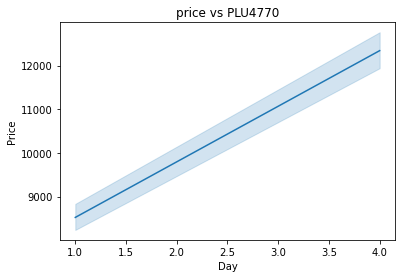

In [124]:
sns.lineplot(x='Day' , y='Price' , data=df)
plt.title('price vs Day')

### From the above line chart we observe as days go by the price of the flight ticket goes on increasing.

Text(0.5, 1.0, 'price vs PLU4770')

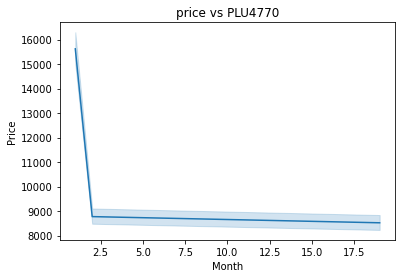

In [125]:
sns.lineplot(y='Price' , x='Month' , data=df)
plt.title('price vs Month')

### From the above line chart we observe as months go the price of flight tickets decreases (Advance Booking).

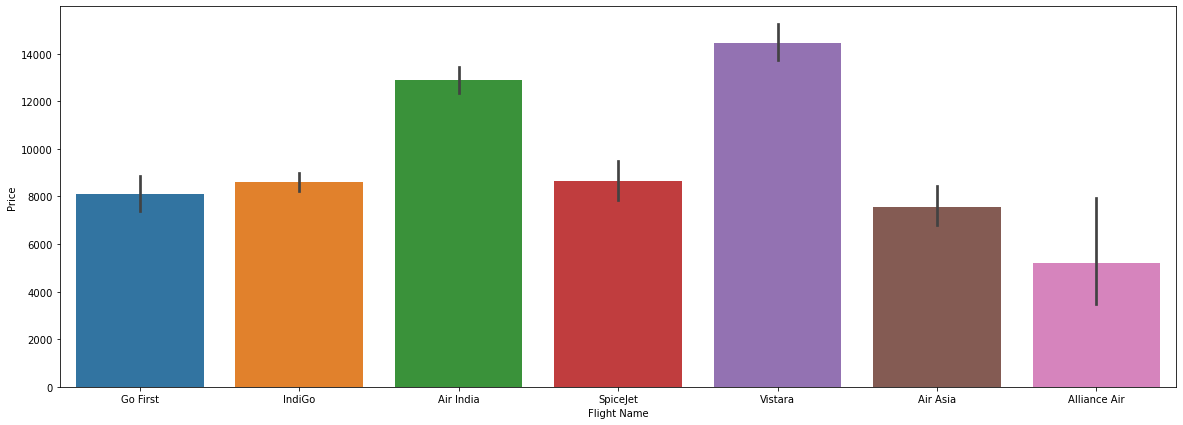

In [126]:
plt.figure(figsize=(20,7))
sns.barplot(x = 'Flight Name',y = 'Price',data = df)

plt.show()

## From the above bar chart, we observe the flight ticket price is high for Vistara and Air India air lines.

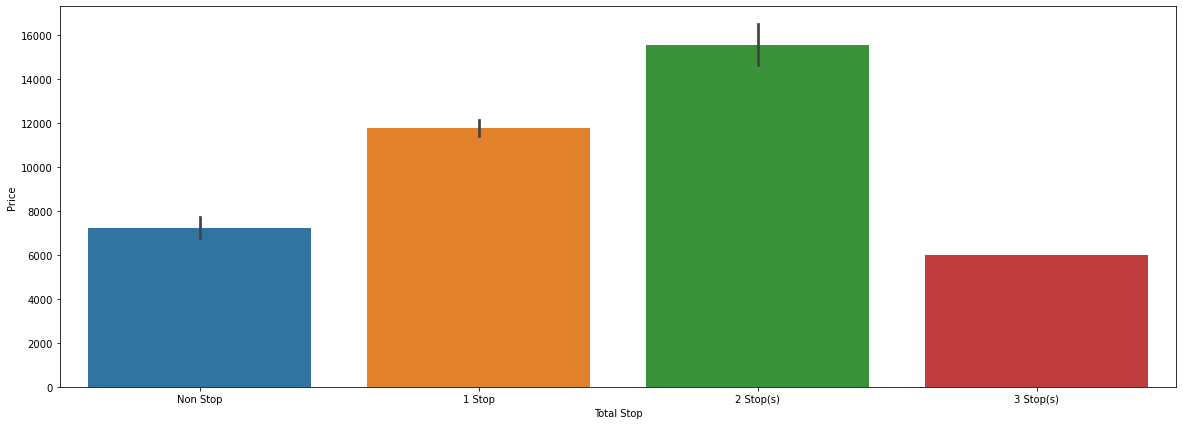

In [127]:
plt.figure(figsize=(20,7))
sns.barplot(x = 'Total Stop',y = 'Price',data = df)

plt.show()

## From the above bar chart, we observe the flight which has 2 stops has had a higher price.

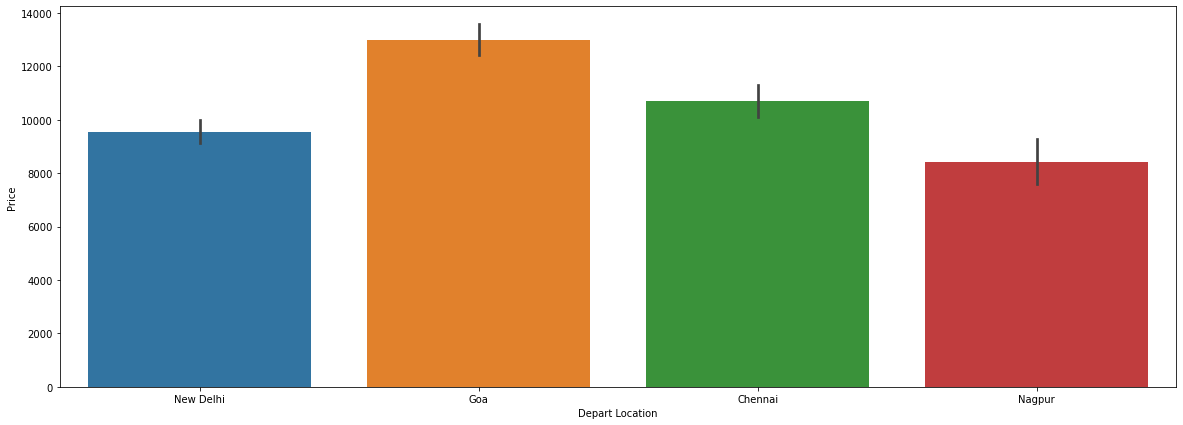

In [129]:
plt.figure(figsize=(20,7))
sns.barplot(x = 'Depart Location',y = 'Price',data = df)

plt.show()

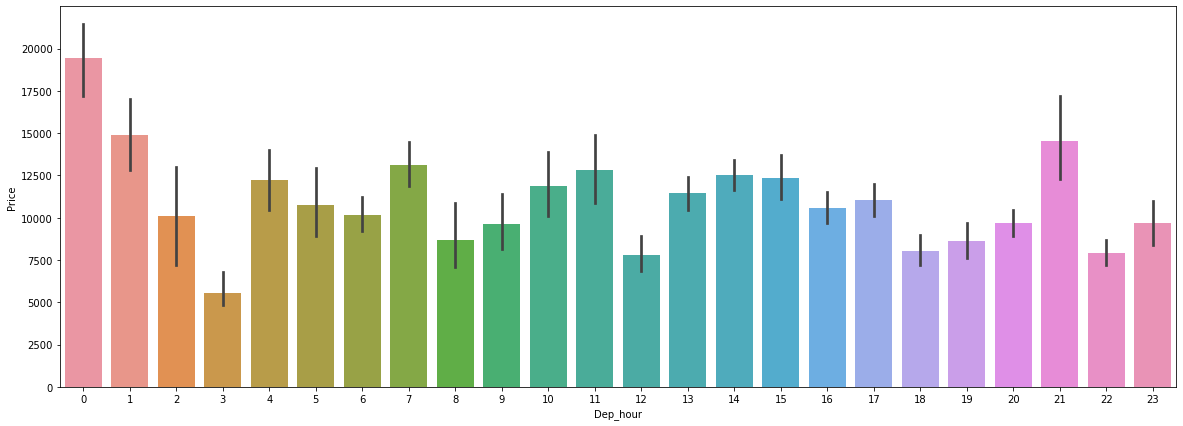

In [130]:
plt.figure(figsize=(20,7))
sns.barplot(x = 'Dep_hour',y = 'Price',data = df)

plt.show()

## From the above graph, we observe the time vs price of the night flight has more price as compared to day-time flights

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1634 entries, 0 to 1642
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Flight Name       1634 non-null   object 
 1   Depart Location   1634 non-null   object 
 2   Arrival Location  1634 non-null   object 
 3   Total Stop        1634 non-null   object 
 4   Price             1634 non-null   float64
 5   Day               1634 non-null   int64  
 6   Month             1634 non-null   int64  
 7   year              1634 non-null   int64  
 8   Dep_hour          1634 non-null   int64  
 9   Dep_min           1634 non-null   int64  
 10  Arrival_hour      1634 non-null   int64  
 11  Arrival_min       1634 non-null   int64  
 12  Duration_hours    1634 non-null   int64  
 13  Duration_mins     1634 non-null   int64  
dtypes: float64(1), int64(9), object(4)
memory usage: 256.0+ KB


## Applying Label Encoder to categorical columns

In [132]:
from sklearn.preprocessing import LabelEncoder

In [133]:
le=LabelEncoder()
df1=le.fit_transform(df['Flight Name'])
pd.Series(df1)

0       3
1       4
2       4
3       4
4       4
       ..
1629    4
1630    4
1631    4
1632    4
1633    4
Length: 1634, dtype: int32

In [134]:
df['Flight Name']=df1

In [135]:
df2=le.fit_transform(df['Depart Location'])
pd.Series(df2)
df['Depart Location']=df2

In [136]:
df3=le.fit_transform(df['Arrival Location'])
pd.Series(df3)
df['Arrival Location']=df3

In [137]:
df4=le.fit_transform(df['Total Stop'])
pd.Series(df4)
df['Total Stop']=df4

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1634 entries, 0 to 1642
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Flight Name       1634 non-null   int32  
 1   Depart Location   1634 non-null   int32  
 2   Arrival Location  1634 non-null   int32  
 3   Total Stop        1634 non-null   int32  
 4   Price             1634 non-null   float64
 5   Day               1634 non-null   int64  
 6   Month             1634 non-null   int64  
 7   year              1634 non-null   int64  
 8   Dep_hour          1634 non-null   int64  
 9   Dep_min           1634 non-null   int64  
 10  Arrival_hour      1634 non-null   int64  
 11  Arrival_min       1634 non-null   int64  
 12  Duration_hours    1634 non-null   int64  
 13  Duration_mins     1634 non-null   int64  
dtypes: float64(1), int32(4), int64(9)
memory usage: 230.5 KB


In [139]:
df.describe()

,Flight Name,Depart Location,Arrival Location,Total Stop,Price,Day,Month,year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
count,1634.000000,1634.000000,1634.000000,1634.000000,1634.000000,1634.000000,1634.000000,1634.0,1634.000000,1634.000000,1634.000000,1634.000000,1634.000000,1634.000000
mean,3.447368,1.403305,0.951040,0.755202,11056.040392,2.990208,7.376377,2023.0,13.439412,26.704406,13.436353,24.850061,8.904529,25.942472
std,2.024040,1.217655,1.174354,1.235840,6344.599763,1.418071,8.292108,0.0,6.046285,18.306739,7.166376,17.573017,6.724074,16.882734
min,0.000000,0.000000,0.000000,0.000000,2600.000000,1.000000,1.000000,2023.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,6828.750000,1.000000,1.000000,2023.0,8.000000,10.000000,8.000000,10.000000,4.000000,10.000000
50%,4.000000,1.000000,0.000000,0.000000,9627.500000,4.000000,2.000000,2023.0,14.000000,25.000000,14.000000,20.000000,7.000000,25.000000
75%,5.000000,3.000000,2.000000,1.000000,13708.000000,4.000000,19.000000,2023.0,18.000000,45.000000,20.000000,40.000000,12.000000,40.000000
max,6.000000,3.000000,3.000000,3.000000,59133.000000,4.000000,19.000000,2023.0,23.000000,55.000000,23.000000,55.000000,44.000000,55.000000


## observation
    1] The dataset contains 1643 rows and 9 columns
    2] There are no null value present in the dataset
    3] There were duplicates in the dataset we have remove the duplicates 
    4] We have change the datatype of the price column  from object to float
    5] The year columns has one specific number so we will drop it 

## Plotting the heatmap to observe Co-relation

In [140]:
corr=df.corr()
corr.shape

(14, 14)

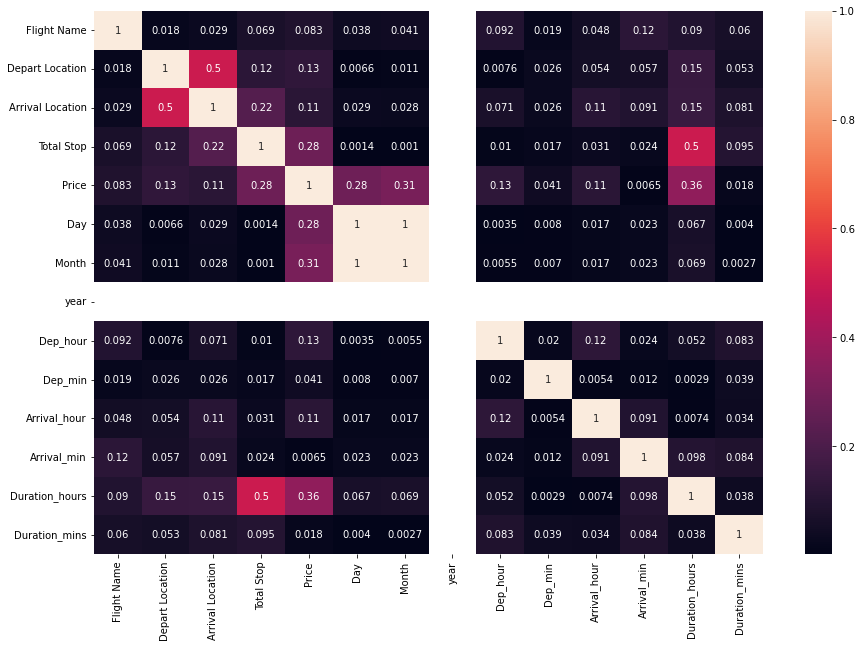

In [141]:
corr=df.corr().abs()
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True)
plt.show()

## From the Heatmap we observe year has only one specific value so its not going to relate it we will drop it and we obsevre Month and day are highly co-related we will check it with scatter plot and durationhours and price is co-related 36%.

In [142]:
df.columns

Index(['Flight Name', 'Depart Location', 'Arrival Location', 'Total Stop',
       'Price', 'Day', 'Month', 'year', 'Dep_hour', 'Dep_min', 'Arrival_hour',
       'Arrival_min', 'Duration_hours', 'Duration_mins'],
      dtype='object')

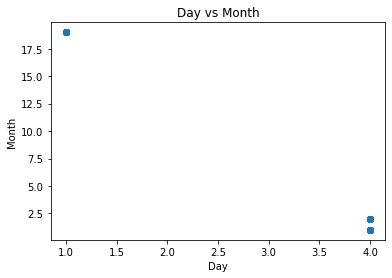

In [143]:
plt.scatter(df['Day'],df['Month'])
plt.xlabel('Day')
plt.ylabel('Month')
plt.title('Day vs Month')
plt.show()

## From the scatter plot we dont see any trend so we dont have any multi-colinearity problem for now we will not drop any column we will wait for VIF.

## Plotting Histogram plot to see how data is distributed on an interval scale

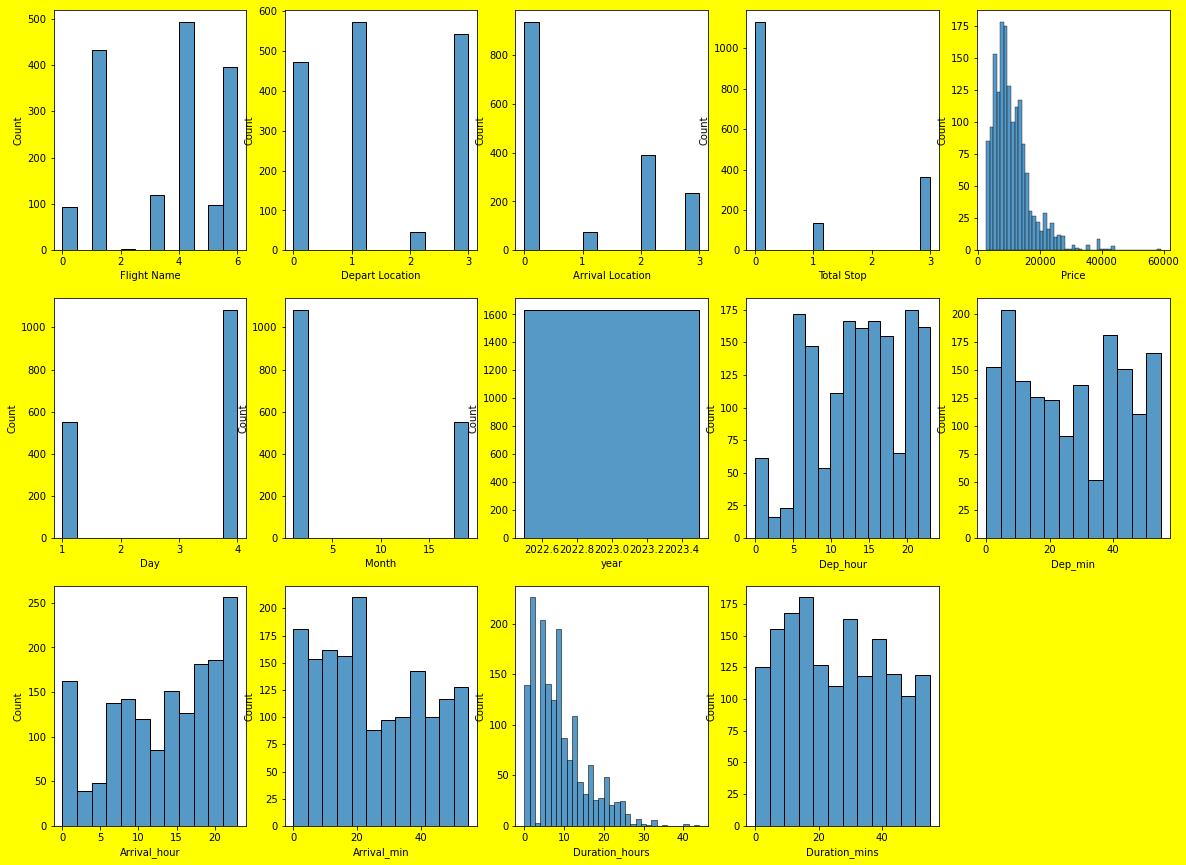

In [144]:
# now lets see how data is distributed for every column 

plt.figure(figsize=(20,15) , facecolor = 'yellow')
plotnumber = 1

for column in df:
    if plotnumber <= 15:
        ax = plt.subplot(3,5,plotnumber)
        sns.histplot (df[column])
        plt.xlabel(column , fontsize=10)
        
    plotnumber += 1
plt.show()

## Plotting Distribution plot to see how data is distributed¶

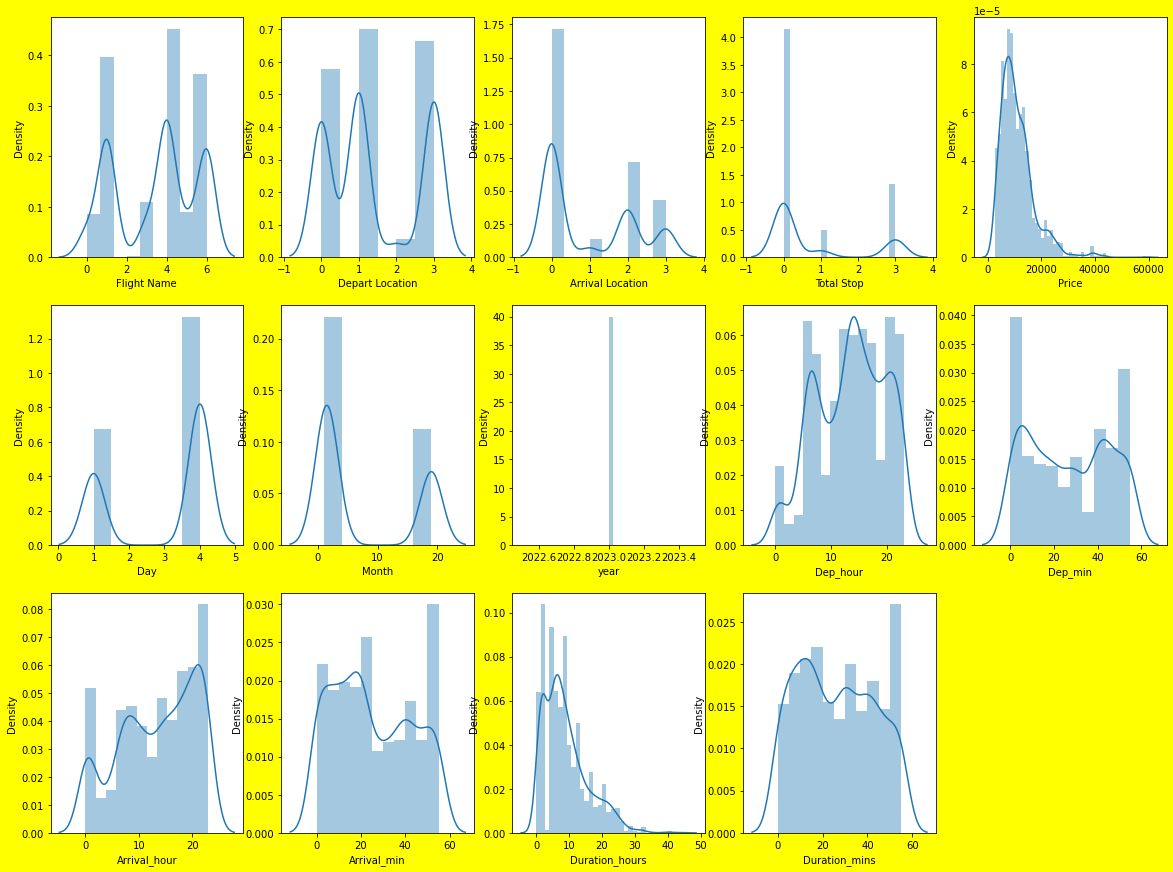

In [145]:
# now lets see how data is distributed for every column 

plt.figure(figsize=(20,15) , facecolor = 'yellow')
plotnumber = 1

for column in df:
    if plotnumber <= 15:
        ax = plt.subplot(3,5,plotnumber)
        sns.distplot (df[column])
        plt.xlabel(column , fontsize=10)
        
    plotnumber += 1
plt.show()

## From the above histogram and Distribution plot we observe our continuous data does not follow a uniform distribution curve and we will treat it.

In [146]:
df.columns

Index(['Flight Name', 'Depart Location', 'Arrival Location', 'Total Stop',
       'Price', 'Day', 'Month', 'year', 'Dep_hour', 'Dep_min', 'Arrival_hour',
       'Arrival_min', 'Duration_hours', 'Duration_mins'],
      dtype='object')

### Seperating the feature and label

In [147]:
X = df.drop(['Price'],axis = 1)
y = df['Price']

## Plotting Scatter plot to see realtion between feature and label

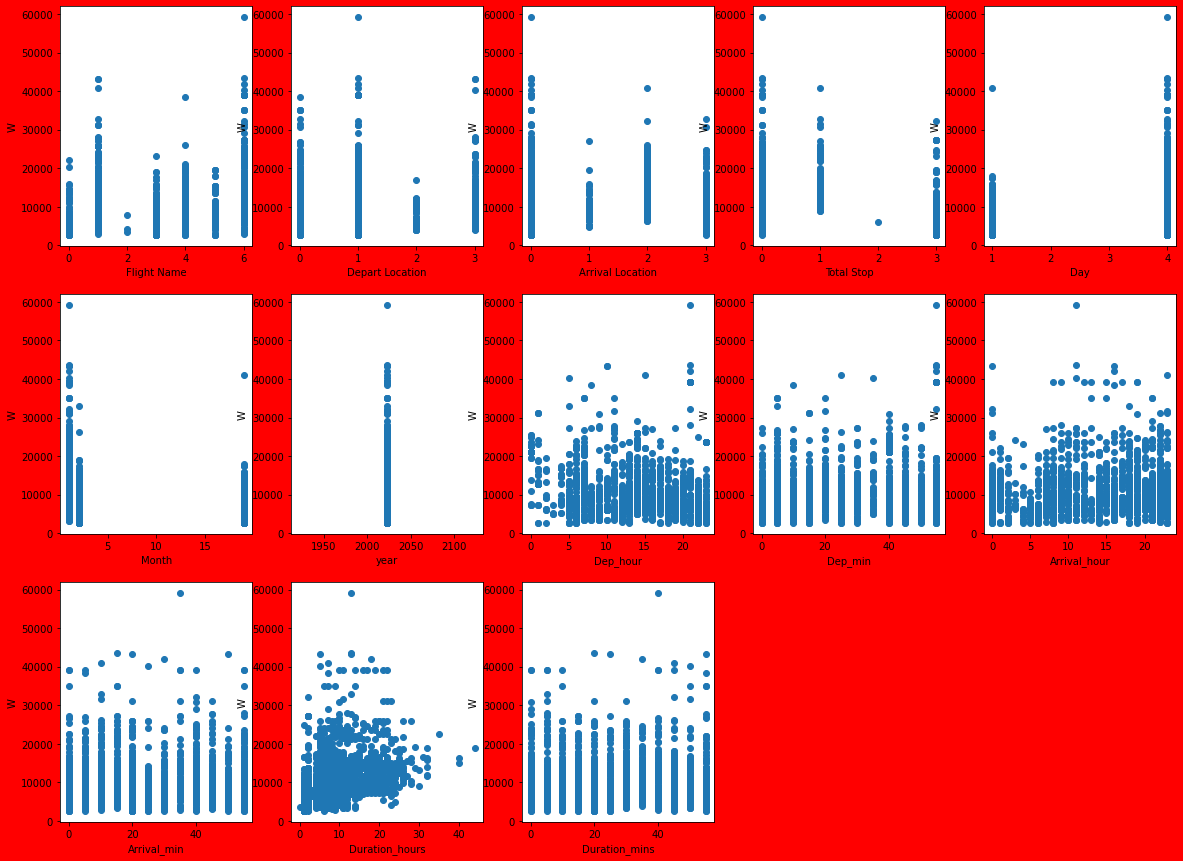

In [148]:
# so find relationship between feature(X) and label(y) by visulization using scatter plot

plt.figure(figsize = (20,15) , facecolor = 'red')
plotnumber = 1

for column in X:   #here feature is new X so X
    if plotnumber <= 15:
        ax = plt.subplot(3,5,plotnumber)
        plt.scatter(X[column] , y)
        plt.xlabel(column , fontsize = 10)
        plt.ylabel('W' , fontsize = 10)
    plotnumber += 1
plt.show()

## Plotting Regression plot to see realtion between feature and label

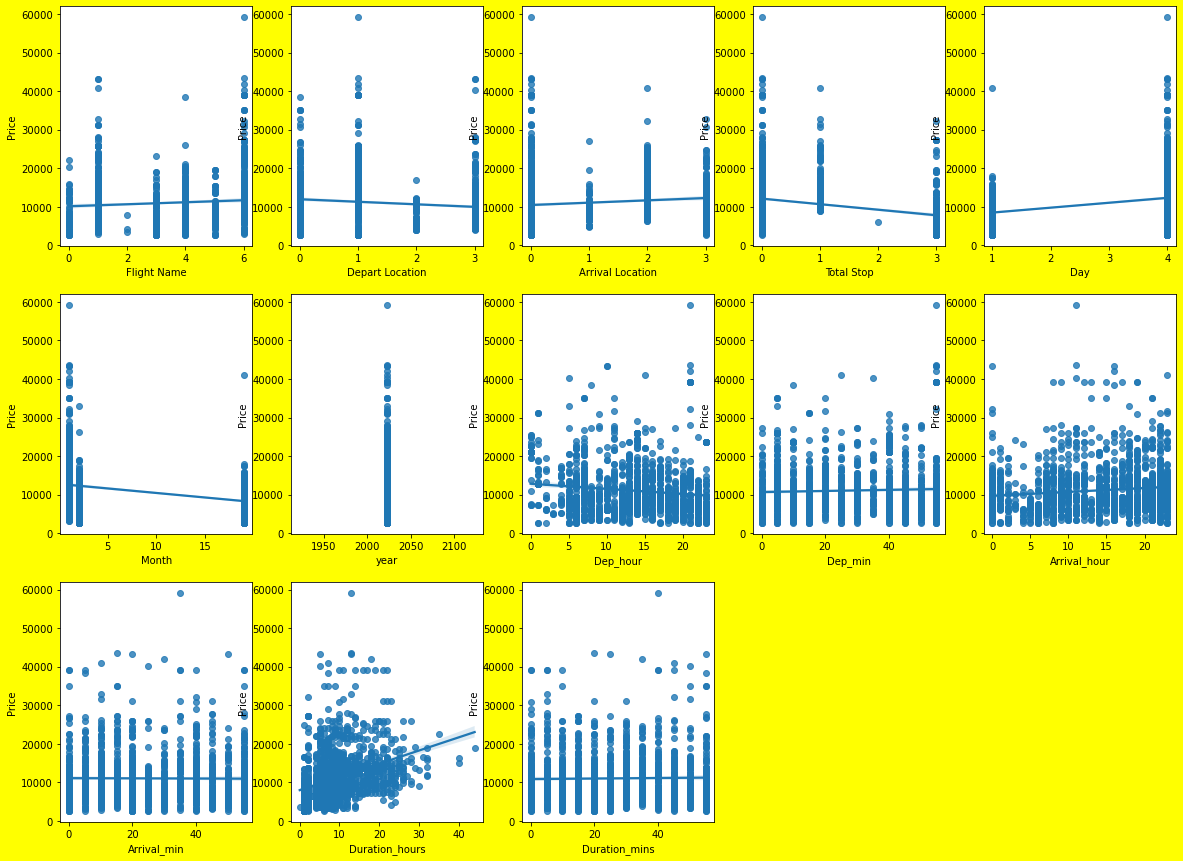

In [149]:
# now lets see how data is distributed for every column 

plt.figure(figsize=(20,15) , facecolor = 'yellow')
plotnumber = 1

for column in X:
    if plotnumber <= 15:
        ax = plt.subplot(3,5,plotnumber)
        sns.regplot (X[column],y)
        plt.xlabel(column , fontsize=10)
        
    plotnumber += 1
plt.show()

### From the above scatter and regression plot we observe all features are positively and negatively co-related except the year column and duration min column.

## Plotting Box plot to see outliers are present are not
plt.figure(figsize=(20,15) , facecolor = 'red')

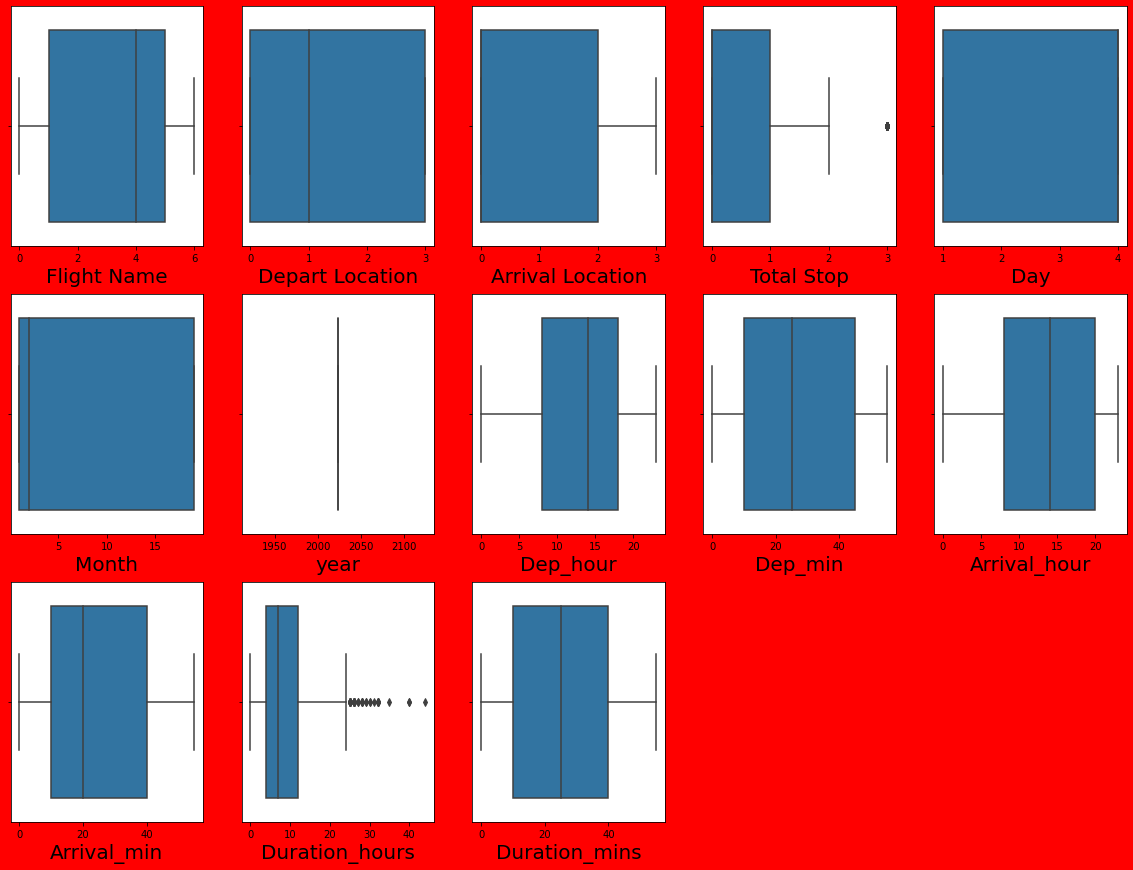

In [150]:
plt.figure(figsize=(20,15) , facecolor = 'red')
graph = 1

for column in X:
    
    if graph <= 15:
        plt.subplot (3,5,graph)
        ax = sns.boxplot(X[column])
        plt.xlabel(column , fontsize = 20)
        
    graph += 1
    
plt.show()

## So we dont see any outliers but total stop and duration hours column has outliers

## We will treat outliers with IQR method

In [151]:
# FINDING THE IQR (inter quantile range) TO IDENTIFY OUTLIERS

#1ST QUNATILE
q1 = df.quantile(0.25)
q1

#2nd quantile
q3 = df.quantile(0.75)
q3

#IQR
iqr = q3 - q1
iqr

Flight Name            4.00
Depart Location        3.00
Arrival Location       2.00
Total Stop             1.00
Price               6879.25
Day                    3.00
Month                 18.00
year                   0.00
Dep_hour              10.00
Dep_min               35.00
Arrival_hour          12.00
Arrival_min           30.00
Duration_hours         8.00
Duration_mins         30.00
dtype: float64

In [152]:
#validating outlier 
preg_high = (q3['Total Stop'] + (1.5*iqr['Total Stop']))
preg_high
# to check how many outliers in preg column 
outlier_high = np.where(df['Total Stop']>preg_high)
outlier_high
#drop the index which we find in above cell
df=df.drop(df.index[outlier_high])
df.shape
#once you delete you should reset index
df.reset_index()

,index,Flight Name,Depart Location,Arrival Location,Total Stop,Price,Day,Month,year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,5,4,3,1,0,7023.0,4,2,2023,20,20,7,50,11,30
1,6,4,3,1,0,7133.0,4,2,2023,23,40,7,50,8,10
2,7,4,3,1,0,7989.0,4,2,2023,12,30,20,25,7,55
3,8,4,3,1,0,8384.0,4,2,2023,22,0,7,50,9,50
4,9,4,3,1,0,8512.0,4,2,2023,5,0,15,30,10,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1264,1638,4,2,0,0,10409.0,1,19,2023,8,15,18,40,10,25
1265,1639,4,2,0,0,10529.0,1,19,2023,8,15,16,10,7,55
1266,1640,4,2,0,0,11299.0,1,19,2023,20,45,7,55,11,10
1267,1641,4,2,0,0,12159.0,1,19,2023,14,55,21,10,6,15


In [153]:
#validating outlier 
preg_high = (q3['Duration_hours'] + (1.5*iqr['Duration_hours']))
preg_high
# to check how many outliers in preg column 
outlier_high = np.where(df['Duration_hours']>preg_high)
outlier_high
#drop the index which we find in above cell
df=df.drop(df.index[outlier_high])
df.shape
#once you delete you should reset index
df.reset_index()

,index,Flight Name,Depart Location,Arrival Location,Total Stop,Price,Day,Month,year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,5,4,3,1,0,7023.0,4,2,2023,20,20,7,50,11,30
1,6,4,3,1,0,7133.0,4,2,2023,23,40,7,50,8,10
2,7,4,3,1,0,7989.0,4,2,2023,12,30,20,25,7,55
3,8,4,3,1,0,8384.0,4,2,2023,22,0,7,50,9,50
4,9,4,3,1,0,8512.0,4,2,2023,5,0,15,30,10,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1218,1638,4,2,0,0,10409.0,1,19,2023,8,15,18,40,10,25
1219,1639,4,2,0,0,10529.0,1,19,2023,8,15,16,10,7,55
1220,1640,4,2,0,0,11299.0,1,19,2023,20,45,7,55,11,10
1221,1641,4,2,0,0,12159.0,1,19,2023,14,55,21,10,6,15


In [154]:
dataloss=((1643-1223)/1643)*100
dataloss

25.562994522215458

## Finding correlation between feature n lable using CORR method

In [155]:
#  (code type      --   feature corrwith label)

df.drop('Price' , axis =1 ).corrwith (df.Price)

Flight Name         0.115306
Depart Location    -0.116474
Arrival Location    0.023961
Total Stop          0.164315
Day                 0.304969
Month              -0.326221
year                     NaN
Dep_hour           -0.139636
Dep_min             0.038393
Arrival_hour        0.133976
Arrival_min         0.001854
Duration_hours      0.231202
Duration_mins      -0.016891
dtype: float64

<AxesSubplot:title={'center':'Correlation with target'}>

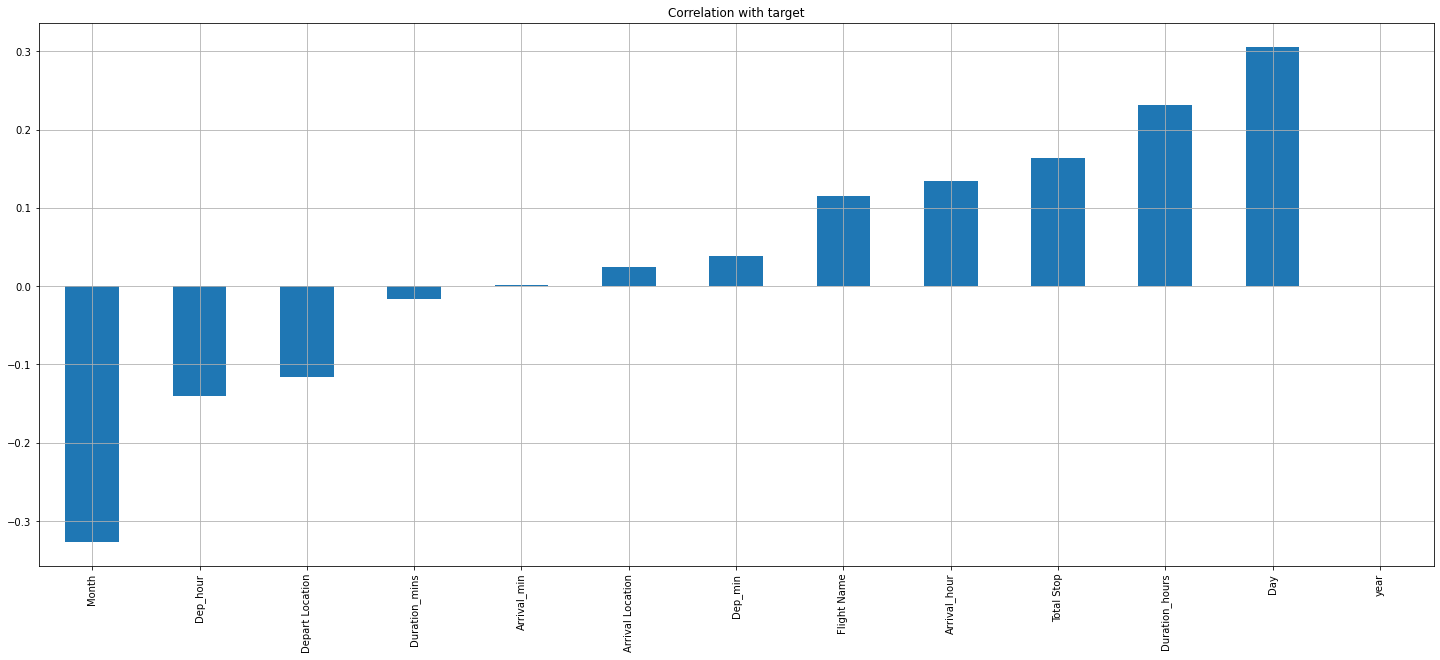

In [156]:
#  (code type      --   feature corrwith label)

df.drop('Price' , axis =1 ).corrwith (df.Price).sort_values().plot(kind='bar',grid=True,figsize=(25,10),title='Correlation with target')

In [157]:
#Removing unncessary columns
df.drop(['year'],axis=1,inplace = True)

In [158]:
X = df.drop(['Price'],axis = 1)
y = df['Price']

## Scaling the data

In [159]:
#scale our data using standard sclar
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_scaled=scalar.fit_transform(X)

## Checking for the multicollinearity Using VIF

In [160]:
# now we check for multicolinearity using VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()  #creating empty dataframe

vif['vif']=[variance_inflation_factor(X_scaled , i) for i in range(X_scaled.shape[1])]  


# for above code first it will execute for statement and shape[1] give all columns and store in i then it will pass to vif 
##  in that we already have X_scaled so it will compare feature vs feature

vif['features']=X.columns  # seperate column for column features

vif

,vif,features
0,1.048588,Flight Name
1,1.426561,Depart Location
2,1.429789,Arrival Location
3,1.086729,Total Stop
4,435.601411,Day
5,435.577058,Month
6,1.114725,Dep_hour
7,1.004075,Dep_min
8,1.100376,Arrival_hour
9,1.048748,Arrival_min


## Selecting all the feature except Day and Month

### Dropping Day and Month because we consider maximum VIF is 5 and day and month has VIF mlre than 5

In [161]:
#Removing unncessary columns
X.drop(['Day','Month'],axis=1,inplace = True)

# LinearRegression Model

In [162]:
#lets import necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

### Finding the best random state

In [163]:
#Best Random State
MaxAccu=0
MaxRS=0

for i in range (0,200):
    X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.25,random_state=i)
    regression=LinearRegression()
    regression.fit(X_train,y_train)
    
    pred=regression.predict(X_train)
    training=regression.score(X_train,y_train)
    print ('Training Score' , training*100 , 'RandomState' ,i)
    
    y_pred=regression.predict(X_test)
    testing=regression.score(X_test,y_test)
    print ('Testing Score' , testing*100 , 'RandomState' ,i)
    print('\n')
    
    
    if testing>MaxAccu:
        MaxAccu=testing
        MaxRS=i
        print('MAXINING TESTING SCORE' , MaxAccu*100 , 'ON RANDOM STATE OF' , i)

Training Score 37.06451706800016 RandomState 0
Testing Score 46.35087612253198 RandomState 0


MAXINING TESTING SCORE 46.35087612253198 ON RANDOM STATE OF 0
Training Score 39.90273625130636 RandomState 1
Testing Score 36.4653167743369 RandomState 1


Training Score 41.12470370115291 RandomState 2
Testing Score 33.30923331069139 RandomState 2


Training Score 38.2890846585227 RandomState 3
Testing Score 39.73985267247845 RandomState 3


Training Score 39.75923123157528 RandomState 4
Testing Score 36.68416651145979 RandomState 4


Training Score 40.359312397050175 RandomState 5
Testing Score 34.768513988233885 RandomState 5


Training Score 41.28585769718314 RandomState 6
Testing Score 32.16148178201792 RandomState 6


Training Score 40.296160440302984 RandomState 7
Testing Score 35.04786720624662 RandomState 7


Training Score 40.537725831440866 RandomState 8
Testing Score 34.89513548133053 RandomState 8


Training Score 40.13164297454204 RandomState 9
Testing Score 35.20317745697438 Ra

In [164]:
print('MAXINING TESTING SCORE' , MaxAccu*100 , 'ON RANDOM STATE OF' , MaxRS)

MAXINING TESTING SCORE 49.27789679835741 ON RANDOM STATE OF 152


### Training the model

In [165]:
#splliting our data into train test split and randomstate 8
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.25,random_state=152)

In [166]:
#Training the data on Linear Regression Model
regression=LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [167]:
#training score
regression.score(X_train,y_train)  

0.36570394252237004

In [168]:
#testing score
regression.score(X_test,y_test) 

0.4927789679835741

## Model Score
    Training Score = 36.570394252237004 %
    Testing Score = 49.27789679835741 %

## Checking MAE , MSE & RMSE scores

In [169]:
#error in terms of numbers
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [170]:
#MAE
mean_absolute_error(y_test,y_pred)

5445.81724158786

In [171]:
#MSE
mean_squared_error(y_test,y_pred)

48955574.74793792

In [172]:
#RMSE
np.sqrt(mean_squared_error(y_test,y_pred))

6996.826048140537

## Scores
    MAE SCORE = 5445.81724158786
    MSE SCORE = 48955574.74793792
    RMSE SCORE = 6996.826048140537


## LASSO MODEL

In [173]:
#import library
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV

In [174]:
##### LASSO MODEL######

lasscv = LassoCV(alphas = None , max_iter = 100)

lasscv.fit(X_train , y_train)

LassoCV(max_iter=100)

In [175]:
# best aplha parameter
alpha = lasscv.alpha_
alpha

2.117376988615322

In [176]:
# now we have best parametr noe train according to it
lasso_reg = Lasso(alpha)
lasso_reg.fit(X_train,y_train)

Lasso(alpha=2.117376988615322)

In [177]:
# now check r2 score
lasso_reg.score(X_test,y_test)

0.4914524199805541

## RIDGE MODEL

In [178]:
############ RIDGE MODEL#########

ridgecv = RidgeCV(alphas = np.arange(0.001,0.1,0.01))
ridgecv.fit(X_train , y_train)


RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]))

In [179]:
# best aplha parameter
alpha = ridgecv.alpha_
alpha

0.001

In [180]:
# now we have best parametr noe train according to it
ridge_reg = Ridge(alpha)
ridge_reg.fit (X_train,y_train)

Ridge(alpha=0.001)

In [181]:
# now check r2 score
ridge_reg.score(X_test,y_test)

0.49279939310127785

## SCORES
    LASSO SCORES = 49.14524199805541 %
    RIDGE SCORES = 49.279939310127785 %

## AdaBoostRegressor Model

In [185]:
# IMPORT LIBRARY 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Finding the best random state

In [186]:
#Best Random State
MaxAccu=0
MaxRS=0

for i in range (0,200):
    X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.25,random_state=i)
    ada=AdaBoostRegressor()
    ada.fit(X_train,y_train)
    
    pred=ada.predict(X_train)
    training=ada.score(X_train,y_train)
    print ('Training Score' , training*100 , 'RandomState' ,i)
    
    y_pred=ada.predict(X_test)
    testing=ada.score(X_test,y_test)
    print ('Testing Score' , testing*100 , 'RandomState' ,i)
    print('\n')
    
    
    if testing>MaxAccu:
        MaxAccu=testing
        MaxRS=i
        print('MAXINING TESTING SCORE' , MaxAccu*100 , 'ON RANDOM STATE OF' , i)

Training Score 53.21949348483377 RandomState 0
Testing Score 33.742653552772694 RandomState 0


MAXINING TESTING SCORE 33.742653552772694 ON RANDOM STATE OF 0
Training Score 58.02316658821584 RandomState 1
Testing Score 46.8502705782621 RandomState 1


MAXINING TESTING SCORE 46.8502705782621 ON RANDOM STATE OF 1
Training Score 57.832340610690515 RandomState 2
Testing Score 52.90971539425555 RandomState 2


MAXINING TESTING SCORE 52.90971539425555 ON RANDOM STATE OF 2
Training Score 48.70217522892277 RandomState 3
Testing Score 50.61137583876383 RandomState 3


Training Score 57.791391751364365 RandomState 4
Testing Score 45.79543502703308 RandomState 4


Training Score 64.64299807940557 RandomState 5
Testing Score 42.644806580280395 RandomState 5


Training Score 53.80215800612317 RandomState 6
Testing Score 37.59574877855162 RandomState 6


Training Score 54.935365022861696 RandomState 7
Testing Score 54.910011519418745 RandomState 7


MAXINING TESTING SCORE 54.910011519418745 ON RAND

In [187]:
print('MAXINING TESTING SCORE' , MaxAccu*100 , 'ON RANDOM STATE OF' , MaxRS)

MAXINING TESTING SCORE 59.68484090349696 ON RANDOM STATE OF 125


### Training the model

In [188]:
#splliting our data into train test split and randomstate 8
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.25,random_state=125)

In [189]:
# adaboost inilize
from sklearn.ensemble import AdaBoostRegressor
ada=AdaBoostRegressor()
ada.fit(X_train,y_train)

AdaBoostRegressor()

In [190]:
 # model prediction on training dataset
y_pred = ada.predict(X_train)

In [191]:
accuracy = metrics.r2_score (y_train , y_pred)
print ('R Squared Score : ' , accuracy)

R Squared Score :  0.6129775142389957


In [192]:
# model prediction on testing datadet
pred = ada.predict(X_test)

In [193]:
accuracy = metrics.r2_score(y_test,pred)
print ('R Squared Score : ' , accuracy)

R Squared Score :  0.6027296465562604


## Model Scores
    Training Score = 61.29775142389957 %
    testing Score = 60.27296465562604 %

## Hyperparameter Tuning for Ada Boost

In [194]:
### HYPERPARAMETER TUNING ###
from sklearn.model_selection import RandomizedSearchCV

In [195]:
params = {'n_estimators': [45,47,53,55,60,70] , 
          'learning_rate':[0.25,0.30,0.40]}

In [196]:
rnd_srch = RandomizedSearchCV(AdaBoostRegressor() , cv=5 , param_distributions=params , n_jobs=-1)

In [197]:
rnd_srch.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=AdaBoostRegressor(), n_jobs=-1,
                   param_distributions={'learning_rate': [0.25, 0.3, 0.4],
                                        'n_estimators': [45, 47, 53, 55, 60,
                                                         70]})

In [198]:
rnd_srch.best_params_

{'n_estimators': 70, 'learning_rate': 0.4}

In [199]:
rnd_srch.best_estimator_

AdaBoostRegressor(learning_rate=0.4, n_estimators=70)

In [206]:
ada = AdaBoostRegressor(learning_rate=0.41, n_estimators=62)
ada.fit(X_train,y_train)

pred=ada.predict(X_train)
print('====Training Score====')
print(metrics.r2_score(y_train,pred))
y_pred = ada.predict(X_test)

print ('=== Testing Score ===')
print (metrics.r2_score(y_test,y_pred))

====Training Score====
0.6141657549055579
=== Testing Score ===
0.6199375310688287


## Model Score after Hyperparameter Tuning
    Training Score = 61.41657549055579 %
    Testing Score = 61.99375310688287 %

## RandomForestRegressor Model

In [209]:
#import necessary library

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Finding the best random state

In [210]:
#Best Random State
MaxAccu=0
MaxRS=0

for i in range (0,200):
    X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.25,random_state=i)
    rf=RandomForestRegressor()
    rf.fit(X_train,y_train)
    
    pred=rf.predict(X_train)
    training=rf.score(X_train,y_train)
    print ('Training Score' , training*100 , 'RandomState' ,i)
    
    y_pred=rf.predict(X_test)
    testing=rf.score(X_test,y_test)
    print ('Testing Score' , testing*100 , 'RandomState' ,i)
    print('\n')
    
    
    if testing>MaxAccu:
        MaxAccu=testing
        MaxRS=i
        print('MAXINING TESTING SCORE' , MaxAccu*100 , 'ON RANDOM STATE OF' , i)

Training Score 95.92807032780328 RandomState 0
Testing Score 80.1283444598521 RandomState 0


MAXINING TESTING SCORE 80.1283444598521 ON RANDOM STATE OF 0
Training Score 95.81582990311529 RandomState 1
Testing Score 77.89392176169969 RandomState 1


Training Score 96.25182009401301 RandomState 2
Testing Score 74.57787253926344 RandomState 2


Training Score 95.7087405770831 RandomState 3
Testing Score 81.6418770649572 RandomState 3


MAXINING TESTING SCORE 81.6418770649572 ON RANDOM STATE OF 3
Training Score 96.51393388856496 RandomState 4
Testing Score 67.84554050049312 RandomState 4


Training Score 96.60644342067714 RandomState 5
Testing Score 65.09989815633178 RandomState 5


Training Score 96.02399628921584 RandomState 6
Testing Score 71.95269252810054 RandomState 6


Training Score 95.97696956285291 RandomState 7
Testing Score 73.42985758637042 RandomState 7


Training Score 96.10837950237477 RandomState 8
Testing Score 75.92913398764325 RandomState 8


Training Score 96.07784354

In [211]:
print('MAXINING TESTING SCORE' , MaxAccu*100 , 'ON RANDOM STATE OF' , MaxRS)

MAXINING TESTING SCORE 82.54174578678297 ON RANDOM STATE OF 12


### Training the model

In [212]:
#splliting our data into train test split and randomstate 8
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.25,random_state=12)

In [213]:
rf=RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [214]:
 # model prediction on training dataset
y_pred = rf.predict(X_train)

In [215]:
accuracy = metrics.r2_score (y_train , y_pred)
print ('R Squared Score : ' , accuracy)

R Squared Score :  0.9551342597494257


In [216]:
# model prediction on testing datadet
pred = rf.predict(X_test)

In [217]:
accuracy = metrics.r2_score(y_test,pred)
print ('R Squared Score : ' , accuracy)

R Squared Score :  0.8176377878169061


## Model Score
    Training Score = 95.51342597494257 %
    Testing Score = 81.76377878169061 %

## Hyperparameter tuning for Random Forest

In [218]:
# RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [219]:
# define parameters
parameters={'criterion':['mse','mae','poisson'],
           'max_features':['auto','sqrt','log2'],
           'min_samples_split':[1,11],
           'max_depth':[1,15],
           'min_samples_leaf':[1,7]}

In [220]:
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae', 'poisson'],
                         'max_depth': [1, 15],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 7],
                         'min_samples_split': [1, 11]})

In [221]:
#print best parameters
print(clf.best_params_)

{'criterion': 'poisson', 'max_depth': 15, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 1}


In [222]:
#reassign best parameters
rf=RandomForestRegressor(criterion= 'poisson', max_depth= 15, max_features= 'auto', min_samples_leaf= 1, min_samples_split= 1)
rf.fit(X_train,y_train)

RandomForestRegressor(criterion='poisson', max_depth=15, max_features='auto',
                      min_samples_split=1)

In [223]:
from sklearn.metrics import r2_score
print ('Training R2 Score: ' ,rf.score(X_train,y_train)*100)

Training R2 Score:  95.51452904666877


In [224]:
pred_decision=rf.predict(X_test)
rfs = r2_score(y_test,pred_decision)

In [225]:
print('Testing R2 Score:' , rfs*100)

Testing R2 Score: 82.53559591247217


## Model Score after Hyperparameter Tuning
    Training Score = 95.51452904666877 %
    Testing Score =  82.53559591247217 %

## GradientBoostingRegressor Model

In [228]:
# import library

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectPercentile , chi2
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor


### Finding the best random state

In [229]:
#Best Random State
MaxAccu=0
MaxRS=0

for i in range (0,200):
    X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.25,random_state=i)
    gbdt=GradientBoostingRegressor()
    gbdt.fit(X_train,y_train)
    
    pred=gbdt.predict(X_train)
    training=gbdt.score(X_train,y_train)
    print ('Training Score' , training*100 , 'RandomState' ,i)
    
    y_pred=gbdt.predict(X_test)
    testing=gbdt.score(X_test,y_test)
    print ('Testing Score' , testing*100 , 'RandomState' ,i)
    print('\n')
    
    
    if testing>MaxAccu:
        MaxAccu=testing
        MaxRS=i
        print('MAXINING TESTING SCORE' , MaxAccu*100 , 'ON RANDOM STATE OF' , i)

Training Score 80.43614490258028 RandomState 0
Testing Score 77.77345700312569 RandomState 0


MAXINING TESTING SCORE 77.77345700312569 ON RANDOM STATE OF 0
Training Score 81.68933977356201 RandomState 1
Testing Score 69.58611899914416 RandomState 1


Training Score 80.70037778894229 RandomState 2
Testing Score 70.63462098305544 RandomState 2


Training Score 79.6940061447242 RandomState 3
Testing Score 77.06165759858222 RandomState 3


Training Score 83.88019384345718 RandomState 4
Testing Score 65.04567786206593 RandomState 4


Training Score 82.42908334496035 RandomState 5
Testing Score 62.889240933176694 RandomState 5


Training Score 81.63110944713809 RandomState 6
Testing Score 69.3606777425553 RandomState 6


Training Score 81.79500628736403 RandomState 7
Testing Score 67.29511455560686 RandomState 7


Training Score 82.16013983220667 RandomState 8
Testing Score 71.48730054851818 RandomState 8


Training Score 82.40849282754988 RandomState 9
Testing Score 71.79324554066886 Rando

In [230]:
print('MAXINING TESTING SCORE' , MaxAccu*100 , 'ON RANDOM STATE OF' , MaxRS)

MAXINING TESTING SCORE 80.17291328111801 ON RANDOM STATE OF 12


### Training the model

In [231]:
#splliting our data into train test split and randomstate 8
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.25,random_state=12)

In [232]:
# initiate GradientBoostingClassifier
gbdt= GradientBoostingRegressor()
gbdt.fit(X_train , y_train)

GradientBoostingRegressor()

In [233]:
 # model prediction on training dataset
y_pred = gbdt.predict(X_train)

In [234]:
from sklearn.metrics import r2_score
import sklearn.metrics as metrics
accuracy = metrics.r2_score (y_train , y_pred)
print ('R Squared Score : ' , accuracy)

R Squared Score :  0.794920444374785


In [235]:
# model prediction on testing datadet
pred = gbdt.predict(X_test)

In [236]:
accuracy = metrics.r2_score(y_test,pred)
print ('R Squared Score : ' , accuracy)

R Squared Score :  0.8014707890064717


## Model Score
    Training Score = 79.4920444374785 %
    Testing Score = 80.14707890064717 %

## Hyperparameter tuning for GradientBoostingRegressor

In [237]:
# HYPERPARAMETER TUNING #
from sklearn.model_selection import GridSearchCV

In [238]:
# internally it will use decision tree as name suggest GBDT and here we are going to add one new parameter i.e learning rate 

grid_params = {'max_depth' : range(1,8),
               'min_samples_split': range(2,12,1),
               'learning_rate': np.arange(0.1 , 0.9),
               'n_estimators': [90,95,100,105,110]}

In [239]:
grid = GridSearchCV(GradientBoostingRegressor() , param_grid = grid_params , n_jobs = -1)

In [240]:
grid.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': array([0.1]),
                         'max_depth': range(1, 8),
                         'min_samples_split': range(2, 12),
                         'n_estimators': [90, 95, 100, 105, 110]})

In [241]:
grid.best_params_

{'learning_rate': 0.1,
 'max_depth': 6,
 'min_samples_split': 7,
 'n_estimators': 100}

In [272]:
gbdt_clf = GradientBoostingRegressor(learning_rate= 0.13,
 max_depth= 8,
 min_samples_split= 8,
 n_estimators= 102)

In [273]:
gbdt_clf.fit(X_train,y_train)

GradientBoostingRegressor(learning_rate=0.13, max_depth=8, min_samples_split=8,
                          n_estimators=102)

In [274]:
 # model prediction on training dataset
y_pred = gbdt_clf.predict(X_train)

In [275]:
accuracy = metrics.r2_score (y_train , y_pred)
print ('R Squared Score : ' , accuracy)

R Squared Score :  0.998991722928025


In [276]:
# model prediction on testing datadet
pred = gbdt_clf.predict(X_test)

In [277]:
accuracy = metrics.r2_score(y_test,pred)
print ('R Squared Score : ' , accuracy)

R Squared Score :  0.8252709404118146


## Model Score after Hyperparameter Tuning
    Training Score = 99.8991722928025 %
    Testing Score = 82.52709404118146 %

# All model score after hyperparameter tuning
** Linear Regression Model

    Training Score = 36.570394252237004 %
    Testing Score = 49.27789679835741 %
** AdaBoostRegressor Model

    Training Score = 61.41657549055579 %
    Testing Score = 61.99375310688287 %
** RandomForestRegressor Model

    Training Score = 95.51452904666877 %
    Testing Score =  82.53559591247217 %
** GradientBoostingRegressor Model

    Training Score = 99.8991722928025 %
    Testing Score = 82.52709404118146 %

# So from above all 4 model scores, we observe RandomForestRegressor Model is best Suited model for this particular model as the training score is 95.51452904666877 % and the testing score is 82.53559591247217 % thus saving this model.

## Saving the Best Scoring Model

In [280]:
# now we save this is modeland transfer to other by using pickel

#first save this model to the local file system 
import pickle
pickle.dump(rf , open ('Airline price pred' , 'wb'))